<a href="https://colab.research.google.com/github/imortezamosavi/FI-ROC/blob/main/FI_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Importance With ROC
This code is for analyzing the ROC (Receiver Operating Characteristic) score for each feature in a dataset using a Decision Tree classifier.

## Importing libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load dataset and preprocess
 Function to load dataset from Excel files and preprocess

In [ ]:
# Function to load dataset from Excel files and preprocess
def make_dataset(class_1_path, class_2_path):
    # Read Excel files and convert to numpy arrays
    class1 = pd.read_excel(class_1_path).to_numpy()
    class2 = pd.read_excel(class_2_path).to_numpy()

    # Create labels for each class
    label_1 = np.ones((class1.shape[0], 1)) * 1
    label_2 = np.ones((class2.shape[0], 1)) * 2

    # Concatenate labels with features
    class1 = np.hstack((label_1, class1))
    class2 = np.hstack((label_2, class2))

    # Concatenate class1 and class2 to form the dataset
    dataset = np.concatenate((class1, class2), axis=0)

    # Split dataset into labels and features
    labels, features = dataset[:, 0], dataset[:, 1:]

    return labels, features

# Paths to the Excel files containing the dataset for each class
class1 = '/content/drive/MyDrive/FE-ROC/Dataset/class1.xlsx'
class2 = '/content/drive/MyDrive/FE-ROC/Dataset/class2.xlsx'

# Load dataset
labels, features = make_dataset(class_1_path=class1, class_2_path=class2)

## Investigate ecah feature

In [ ]:
# List to store ROC scores for each feature
roc_values = []

# Loop through each feature
for i in range(features.shape[1]):
    # Extract a single feature and reshape it to 2D array
    feature = features[:, i].reshape(-1, 1)

    # Perform Min-Max scaling on the feature
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(feature)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(feature, labels, test_size=0.3, random_state=42)

    # Initialize and train Decision Tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    # Predict probabilities for the test set
    y_score = clf.predict_proba(x_test)

    # Calculate ROC AUC score for the positive class
    RC = roc_auc_score(y_test, y_score[:, 1])

    # Append ROC score to the list
    roc_values.append(RC)

## Plotting the ROC scores for each feature

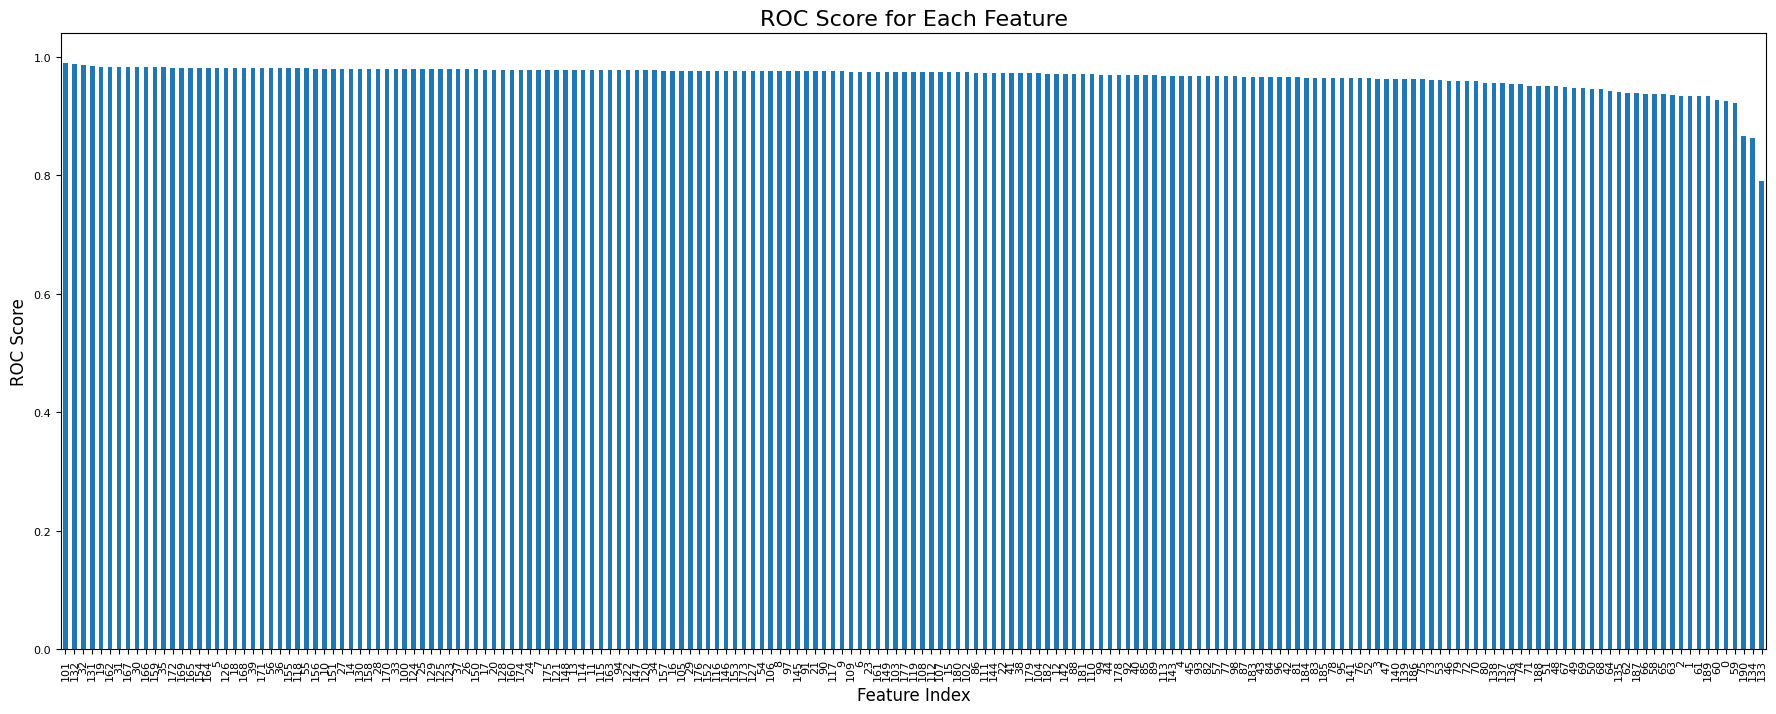

In [ ]:
roc_values = pd.Series(roc_values)
roc_values.index = np.arange(features.shape[1])

ax = roc_values.sort_values(ascending=False).plot.bar(figsize=(22, 8))
ax.set_title('ROC Score for Each Feature', fontsize=16)
ax.set_xlabel('Feature Index', fontsize=12)
ax.set_ylabel('ROC Score', fontsize=12)
ax.tick_params(axis='both', labelsize=8)

plt.show()